In [1]:
import os
import pytesseract as ta
from PyPDF2 import PdfWriter
import io

img_path = "../output/output"
output_path = "./output/pdf/test.pdf"

config = '--oem 3 --psm 11'
languages = 'kor+eng'

img_list = os.listdir(img_path)
img_list.sort()

In [68]:
filename = os.path.join(img_path, img_list[37])
filename

'../output/output/037_4.47.png'

In [69]:
config = '--psm 4 -c preserve_interword_spaces=1'
pdf = ta.image_to_pdf_or_hocr(
    filename, 
    extension='pdf', 
    lang=languages, 
    config=config
    )

In [70]:
pdf_file_in_memory = io.BytesIO(pdf)
merger = PdfWriter()
merger.append(pdf_file_in_memory)

merger.write('test.pdf')

(True, <_io.FileIO [closed]>)

In [72]:
from PIL import Image
image = Image.open(filename)
config = '--psm 4 -c preserve_interword_spaces=1'
# config = '--oem 3 --psm 11'
text = ta.image_to_string(image, lang=languages, config=config)

In [73]:
text

'빅데이터의 데이터 파이프라인은 어디에서 데이터를 수집하여 무엇을 실현하고 싶은\n지에 따라 변화한다. 처음에는 간단한 구성으로도 끝나지만, 하고 Be 일이 증가함에\n따라 시스템은 점차 복잡해지고 그것을 어떻게 조합시킬지가 문제가 된다\n\n데이터 수집 벌크 형과 스트리밍 형의 데이터 전송\n\n데이터 파이프라인은 데이터를 모으는 부분부터 시작한다. 데이터는 여러 장소에서 발\n생하고 각각 다른 형태를 보인다. 데이터베이스에 쓰인 거래처 데이터, 파일 서버에 축\n적된 로그 파일, 스마트 폰 등의 모바일 애플리케이션에서 모여진 이벤트 데이터 및 임\n베디드622568060) 장비에서 보내진 센서 데이터 등 각각 서로 다른 기술로 데이터를 전\n송한다.\n\n"데이터 MA Gata 205660의 방법은 크게 다음의 두 가지가 있다(그림 14@ @),\n\nㆍ Balbulk) 형\n\n+ 스트리밍66082108) 형\n\n데이터 수집 이    안 =e\n am 9 Cas) as\na  te\n\n이터 OF\n(SQL)\nto\n\ne ㄴ ㅇ\n데이터 수집                                         Tanne\n\n워크플로 관리\n\n그림 1.4 빅데이터를 위한 데이터 파이프라인\n\n벌크 형은 이미 어딘가에 존재하는 데이터를 정리해 추출하는 방법으로, 데이터베이\n스와 파일 서버 등에서 정기적으로 데이터를 수집하는 데에 사용한다. 한편, 스트리밍\nBe 차례차례로 생성되는 ACES BUM] 계속해서 보내는 방법으로 모바일 애플\n리케이션과 임베디드 장비 등에서 널리 데이터를 수집하는 데 사용된다\n\n12 cuaptert 빅데이터의 기초 지식\n\n'

In [74]:
names = [n.replace("\n\n", "") for n in text]

In [75]:
text.split("\n\n")

['빅데이터의 데이터 파이프라인은 어디에서 데이터를 수집하여 무엇을 실현하고 싶은\n지에 따라 변화한다. 처음에는 간단한 구성으로도 끝나지만, 하고 Be 일이 증가함에\n따라 시스템은 점차 복잡해지고 그것을 어떻게 조합시킬지가 문제가 된다',
 '데이터 수집 벌크 형과 스트리밍 형의 데이터 전송',
 '데이터 파이프라인은 데이터를 모으는 부분부터 시작한다. 데이터는 여러 장소에서 발\n생하고 각각 다른 형태를 보인다. 데이터베이스에 쓰인 거래처 데이터, 파일 서버에 축\n적된 로그 파일, 스마트 폰 등의 모바일 애플리케이션에서 모여진 이벤트 데이터 및 임\n베디드622568060) 장비에서 보내진 센서 데이터 등 각각 서로 다른 기술로 데이터를 전\n송한다.',
 '"데이터 MA Gata 205660의 방법은 크게 다음의 두 가지가 있다(그림 14@ @),',
 'ㆍ Balbulk) 형',
 '+ 스트리밍66082108) 형',
 '데이터 수집 이    안 =e\n am 9 Cas) as\na  te',
 '이터 OF\n(SQL)\nto',
 'e ㄴ ㅇ\n데이터 수집                                         Tanne',
 '워크플로 관리',
 '그림 1.4 빅데이터를 위한 데이터 파이프라인',
 '벌크 형은 이미 어딘가에 존재하는 데이터를 정리해 추출하는 방법으로, 데이터베이\n스와 파일 서버 등에서 정기적으로 데이터를 수집하는 데에 사용한다. 한편, 스트리밍\nBe 차례차례로 생성되는 ACES BUM] 계속해서 보내는 방법으로 모바일 애플\n리케이션과 임베디드 장비 등에서 널리 데이터를 수집하는 데 사용된다',
 '12 cuaptert 빅데이터의 기초 지식',
 '']

In [76]:
from bs4 import BeautifulSoup
xml = ta.image_to_alto_xml(filename, lang=languages ,config=config)
ocr_xml = BeautifulSoup(xml, features="lxml")

/var/folders/6f/0vpfcd3934gfj6n_tcl_bmyr0000gn/T/ipykernel_66843/3693338077.py:3: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  ocr_xml = BeautifulSoup(xml, features="lxml")


In [78]:
ocr_xml.find_all("textline")

[<textline height="29" hpos="167" id="line_0" vpos="189" width="1011">
 <string content="빅" height="29" hpos="167" id="string_0" vpos="189" wc="0.93" width="22"></string><sp hpos="189" vpos="189" width="6"></sp>
 <string content="데" height="29" hpos="195" id="string_1" vpos="189" wc="0.93" width="19"></string><sp hpos="214" vpos="189" width="4"></sp>
 <string content="이" height="29" hpos="218" id="string_2" vpos="189" wc="0.93" width="21"></string><sp hpos="239" vpos="189" width="6"></sp>
 <string content="터" height="29" hpos="245" id="string_3" vpos="189" wc="0.93" width="19"></string><sp hpos="264" vpos="189" width="4"></sp>
 <string content="의" height="29" hpos="268" id="string_4" vpos="189" wc="0.93" width="19"></string><sp hpos="287" vpos="189" width="21"></sp>
 <string content="데" height="29" hpos="308" id="string_5" vpos="189" wc="0.93" width="22"></string><sp hpos="330" vpos="189" width="3"></sp>
 <string content="이" height="29" hpos="333" id="string_6" vpos="189" wc="0.93" wid

In [80]:
def tesseract_region_extractor(context):
    x, y, w, h = (
        context.get("hpos"),
        context.get("vpos"),
        context.get("width"),
        context.get("height"),
    )
    x, y, w, h = int(x), int(y), int(w), int(h)
    x2, y2 = x + w, y + h
    return dict(x1=x, y1=y, x2=x2, y2=y2)

def tesseract_text_extractor(context):
    return_data = ""
    if context.name == "string":
        tokens = [context]
    else:
        tokens = context.find_all("string")
    token_count = len(tokens) - 1

    for index, token in enumerate(tokens):
        return_data += token.get("content")
        next_tag = token.find_next()
        if index < token_count and next_tag is not None and next_tag.name == "sp":
            return_data += " "

        if index < token_count and next_tag is not None and next_tag.name == "textline":
            return_data += "\n"

    return return_data

def tesseract_index_extraction(context):
    idx = context.get("id")
    if idx is not None:
        idx = idx.split("_")[-1]
        idx = int(idx)
    return idx


def tesseract_token_extractor(context):
    token_list = []
    for token in context.find_all("string"):
        text = token.get("content")
        region = tesseract_region_extractor(token)
        index = tesseract_index_extraction(token)
        _ = dict(
            text=text, region=region, idx=index, meta_data=dict(text_length=len(text))
        )
        token_list.append(_)
    return token_list


In [81]:
lines = []
for line in ocr_xml.find_all("textline"):
    text = tesseract_text_extractor(line)
    region = tesseract_region_extractor(line)
    tokens = tesseract_token_extractor(line)
    index = tesseract_index_extraction(line)
    meta_data = dict(token_count=len(tokens), text_length=len(text))
    _ = dict(
        text=text, region=region, idx=index, tokens=tokens, meta_data=meta_data
    )
    lines.append(_)

In [86]:
lines[12]

{'text': '데 이 터 수 집 이 안 =e',
 'region': {'x1': 318, 'y1': 1004, 'x2': 1072, 'y2': 1065},
 'idx': 12,
 'tokens': [{'text': '데',
   'region': {'x1': 318, 'y1': 1035, 'x2': 333, 'y2': 1054},
   'idx': 295,
   'meta_data': {'text_length': 1}},
  {'text': '이',
   'region': {'x1': 339, 'y1': 1035, 'x2': 351, 'y2': 1054},
   'idx': 296,
   'meta_data': {'text_length': 1}},
  {'text': '터',
   'region': {'x1': 356, 'y1': 1035, 'x2': 370, 'y2': 1054},
   'idx': 297,
   'meta_data': {'text_length': 1}},
  {'text': '수',
   'region': {'x1': 382, 'y1': 1035, 'x2': 402, 'y2': 1054},
   'idx': 298,
   'meta_data': {'text_length': 1}},
  {'text': '집',
   'region': {'x1': 401, 'y1': 1031, 'x2': 416, 'y2': 1065},
   'idx': 299,
   'meta_data': {'text_length': 1}},
  {'text': '이',
   'region': {'x1': 480, 'y1': 1004, 'x2': 498, 'y2': 1022},
   'idx': 300,
   'meta_data': {'text_length': 1}},
  {'text': '안',
   'region': {'x1': 757, 'y1': 1004, 'x2': 775, 'y2': 1022},
   'idx': 301,
   'meta_data': {'text_

In [5]:
import sys
sys.path.append("/Users/dabinkim/workspace/db/video2pdf/ocrpy/ocrpy")
sys.path.append("/Users/dabinkim/workspace/db/video2pdf/ocrpy/ocrpy/experimental")
sys.path.append("/Users/dabinkim/workspace/db/video2pdf/ocrpy/ocrpy/parser")
sys.path.append("/Users/dabinkim/workspace/db/video2pdf/ocrpy/ocrpy/pipelines")
sys.path.append("/Users/dabinkim/workspace/db/video2pdf/ocrpy/ocrpy/utils")
sys.path.append("/Users/dabinkim/workspace/db/video2pdf/ocrpy/ocrpy/io")







In [2]:
print(sys.path)

['/Users/dabinkim/workspace/db/video2pdf/notebook', '/Users/dabinkim/miniconda3/envs/pdfocr_env/lib/python310.zip', '/Users/dabinkim/miniconda3/envs/pdfocr_env/lib/python3.10', '/Users/dabinkim/miniconda3/envs/pdfocr_env/lib/python3.10/lib-dynload', '', '/Users/dabinkim/miniconda3/envs/pdfocr_env/lib/python3.10/site-packages', '/Users/dabinkim/workspace/db/video2pdf/ocrpy/ocrpy']


In [1]:
from ocrpy import TextOcrPipeline
from pdf2image import convert_from_path
from ocrpy.experimental import DocumentClassifier
from ocrpy import DocumentReader, StorageWriter, TextParser, TableParser
from ocrpy.experimental import DocumentLayoutParser
PARSER_BACKEND = "pytesseract"

doc_1 = "test.pdf"
reader = DocumentReader(file=doc_1)
text_parser = TextParser(backend=PARSER_BACKEND)

layout_parser = DocumentLayoutParser()
result = layout_parser.parse(reader, text_parser)
result

{0: {'text': '빅데이터의 데이터 파이프라인은 어디에서 데이터를 수집하여 TAS 실현하고 싶은\n지에 따라 변화한다. 처음에는 간단한 구성으로도 끝나지만, 하고 싶은 일이 중가함에\n따라 시스템은 점차 복잡해지고 TAS 어떻게 조합시킬지가 문제가 된다.\n\n데이터 수집 벌크 형과 스트리밍 형의 데이터 WS\n\n데이터 파이프라인은 데이터를 BOE 부분부터 시작한다. 데이터는 여러 장소에서 발\n생하고 각각 다른 형태를 보인다. 데이터베이스에 쓰인 거래처 데이터, 파일 서버에 축\n적된 로그 파일, 스마트 = 등의 모바일 애플리케이션에서 모여진 이벤트 데이터 및 임\nH]/U]/=(embedded) 장비에서 보내진 AMA] 데이터 등 각각 서로 다른 기술로 데이터를 전\n송한다.\n\n\'데이터 HB Gata transfer) 2] 방법은 크게 다음의 두 가지가 있다(그림 14 @ @),\n\nㆍ HL (bulk) 형\n\n* 스트리밍66684108) 형\n\n데이터 수집 "      "  계    =\n  [w= 0 Gas) bas\n\nWo      Lo Mpeo\n\n네  ~ 00 0\n데이터 수집\n. } ll 분산 데이터 처리\n\n워크플로 관리\n\n그림 1.4 빅데이터를 위한 데이터 파이프라인\n\n벌크 형은 이미 어딘가에 존재하는 데이터를 정리해 추출하는 방법으로, 데이터베이\nASM 파일 서버 등에서 정기적으로 데이터를 수집하는 데에 사용한다. 한편, 스트리밍\n형은 차례차례로 생성되는 데이터를 BAR] 계속해서 보내는 방법으로 모바일 애플\n리케이션과 임베디드 장비 등에서 널리 데이터를 수집하는 데 사용된다\n\n12  CHAPTER 1 빅데이터의 7/2 지식\n',
  'lines': [{'text': 'BIE}OTE}S] Glo}E] Bpo|}Qle. ojo dfole}S + zsho} Hols alela}an ale',
    'region': {'x1': 477, 'y1': 539, 'x2': 3366, 'y2': 621},


In [2]:
reader = DocumentReader(file=doc_1)
table_parser = TableParser() # Table parser
parsed_table = table_parser.parse(reader,  attempt_csv_conversion=True) # parse the document using the selected parser backend.

In [3]:
from IPython.display import HTML, display

for page, tables in parsed_table.items():
    print(f"Page {page} has {len(tables)} tables")

display(HTML(parsed_table[0][0].to_html()))

Page 0 has 1 tables


In [4]:
import cv2
from PIL import Image
import numpy as np

pages = convert_from_path(doc_1)
page = pages[0]
image = np.array(page)
# image = cv2.imread(pages[0], None, fx=0.5, fy=0.5)
def draw_blocks(image, result):
    for block in result[0]['blocks']:
        region = block['region']
        block_type = block['meta_data']['type']
        x1,y1, x2,y2 = region['x1'], region['y1'], region['x2'], region['y2']
        image = cv2.rectangle(image, (x1, y1), (x2, y2 ), (41,128,228), 1)
        cv2.putText(image, block_type, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (17,51,95), 2)
    pil_image=Image.fromarray(image)
    return pil_image

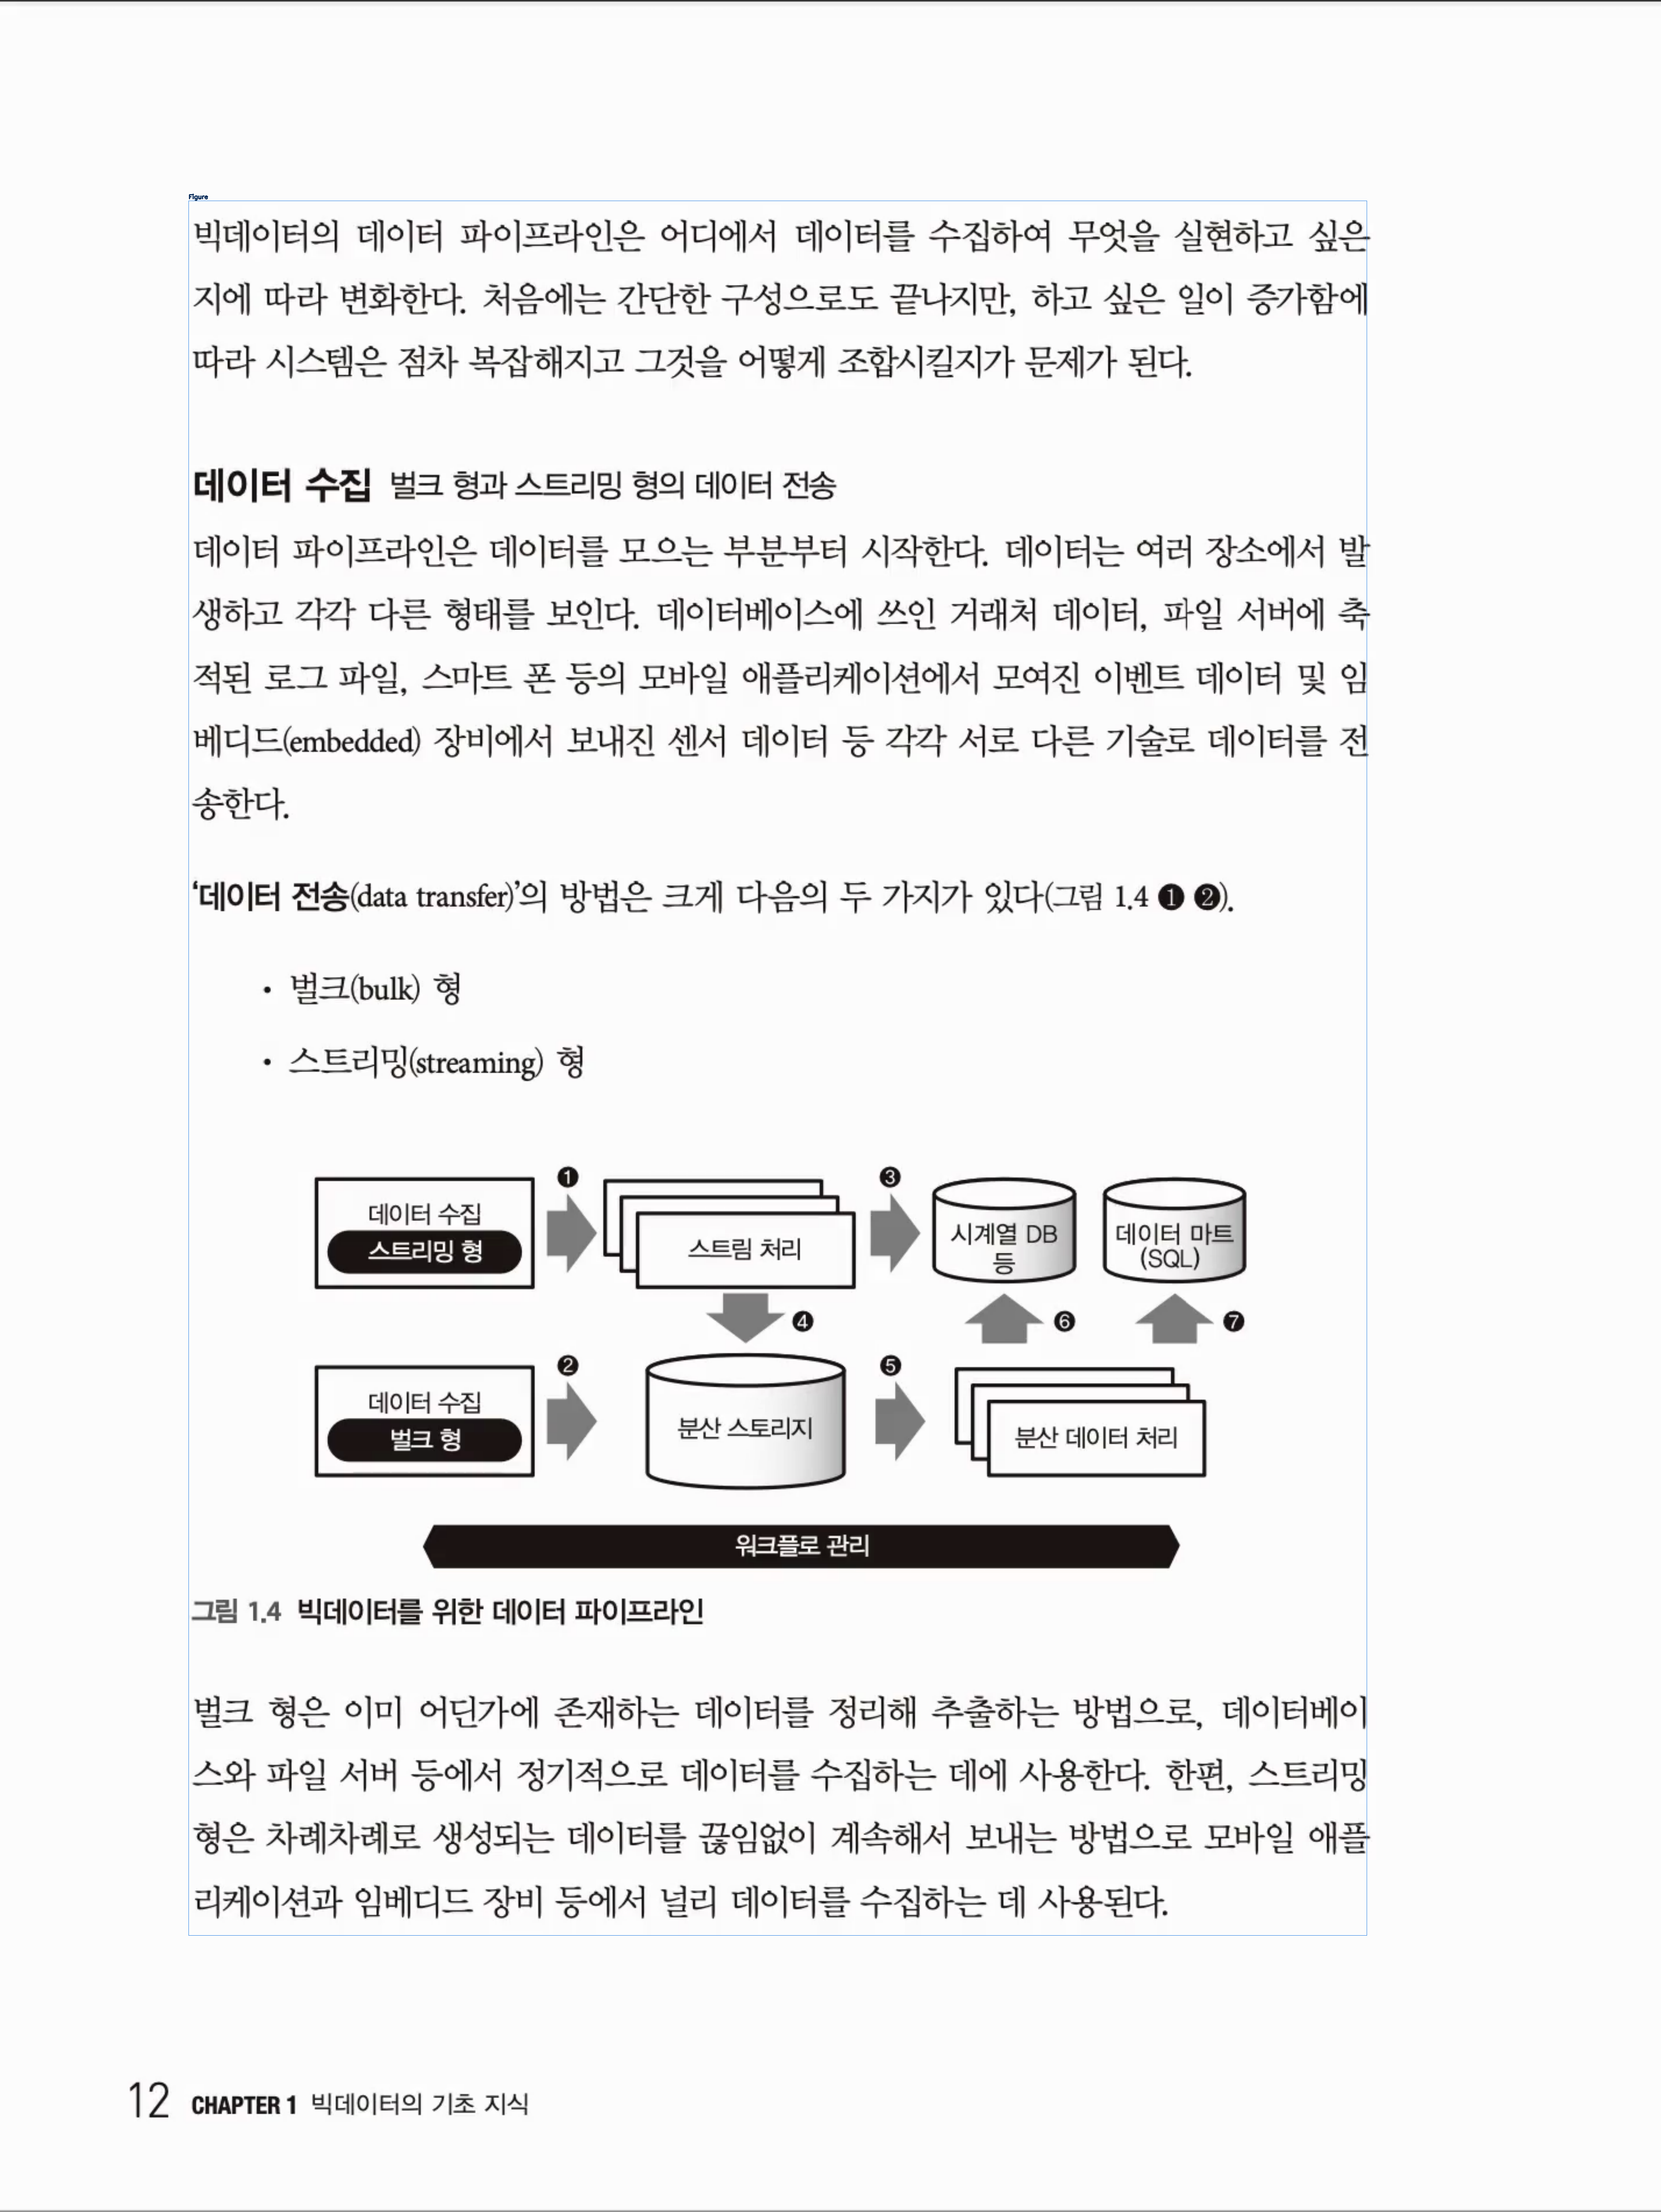

In [5]:
draw_blocks(image, result)

In [6]:
image = cv2.imread(doc_1)
print("-----image-----")
print(image)

-----image-----
None


In [7]:
result

{0: {'text': '빅데이터의 데이터 파이프라인은 어디에서 데이터를 수집하여 TAS 실현하고 싶은\n지에 따라 변화한다. 처음에는 간단한 구성으로도 끝나지만, 하고 싶은 일이 중가함에\n따라 시스템은 점차 복잡해지고 TAS 어떻게 조합시킬지가 문제가 된다.\n\n데이터 수집 벌크 형과 스트리밍 형의 데이터 WS\n\n데이터 파이프라인은 데이터를 BOE 부분부터 시작한다. 데이터는 여러 장소에서 발\n생하고 각각 다른 형태를 보인다. 데이터베이스에 쓰인 거래처 데이터, 파일 서버에 축\n적된 로그 파일, 스마트 = 등의 모바일 애플리케이션에서 모여진 이벤트 데이터 및 임\nH]/U]/=(embedded) 장비에서 보내진 AMA] 데이터 등 각각 서로 다른 기술로 데이터를 전\n송한다.\n\n\'데이터 HB Gata transfer) 2] 방법은 크게 다음의 두 가지가 있다(그림 14 @ @),\n\nㆍ HL (bulk) 형\n\n* 스트리밍66684108) 형\n\n데이터 수집 "      "  계    =\n  [w= 0 Gas) bas\n\nWo      Lo Mpeo\n\n네  ~ 00 0\n데이터 수집\n. } ll 분산 데이터 처리\n\n워크플로 관리\n\n그림 1.4 빅데이터를 위한 데이터 파이프라인\n\n벌크 형은 이미 어딘가에 존재하는 데이터를 정리해 추출하는 방법으로, 데이터베이\nASM 파일 서버 등에서 정기적으로 데이터를 수집하는 데에 사용한다. 한편, 스트리밍\n형은 차례차례로 생성되는 데이터를 BAR] 계속해서 보내는 방법으로 모바일 애플\n리케이션과 임베디드 장비 등에서 널리 데이터를 수집하는 데 사용된다\n\n12  CHAPTER 1 빅데이터의 7/2 지식\n',
  'lines': [{'text': 'BIE}OTE}S] Glo}E] Bpo|}Qle. ojo dfole}S + zsho} Hols alela}an ale',
    'region': {'x1': 477, 'y1': 539, 'x2': 3366, 'y2': 621},
